### Сортировка блоков

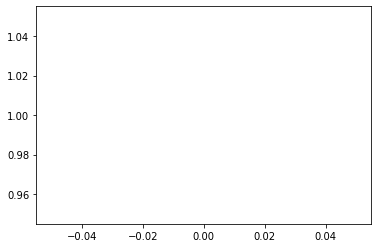

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import cv2

plt.plot([1])

In [40]:

def drow_image_box(bboxs, size=(100,100), display_check = True):
    img_torch = torch.ones(size=(size[0],size[1],3)) * 255
    img_np = img_torch.numpy()
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    color = (255, 0, 0)
    thickness = 1
    it = 0
    for bbox_line in bboxs:
        #print(f'{bbox_line=}')
        for i,box in bbox_line:

            # x = box[2] - ((box[2] - box[0])/2) - 4
            # y = box[3]- ((box[3] - box[1])/2) + 6

            x = box[0] # (box[2] + box[0])/2 - 4
            y = (box[3] + box[1])/2 + 6
            it += 1
            org = (int(x), int(y))
            text = f'{i}_{it}'
            if not display_check:
                text = f'{i}'
                assert i == str(it), f'sort not correct {i=} {it=}' 
            img_np = cv2.putText(img_np,text,org, font, fontScale, color, thickness, cv2.LINE_AA)
            img_np = cv2.rectangle(img_np,(box[0],box[1]),(box[2],box[3]),(0,0,155),1)
    return img_np
    #plt.plot([1])

### Добавление отступов от левого края

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


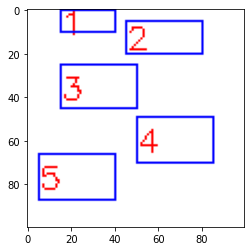

In [106]:
import numpy as np 
import importlib
import util.my_utils as m
importlib.reload(m)
import matplotlib.pyplot as plt
from  util.my_utils import sorting_bounding_box, sorting_bounding_box_v2

list_points = [
    [ 
        ['2', [ 5+40,  5, 40+40, 20] ], #0
        ['5', [ 5, 25+50, 40, 45+50] ], #3
        ['3', [ 5+10, 25, 40+10, 45] ], #1
        ['1', [ 5,  5, 40, 20] ], #0
        ['4', [ 5+45, 25+25, 40+45, 45+25] ], #2
    ],
    [ 
        ['2', [ 5+40,  5, 40+40, 20] ], #0
        ['5', [ 5, 25+50, 40, 45+50] ], #3
        ['3', [ 5+10, 25, 40+10, 45] ], #1
        ['1', [ 15,  15, 40, 20] ], #0
        ['4', [ 5+45, 25+25, 40+45, 45+25] ], #2
    ]
    ,[
        ['3', [ 0, 25, 20, 25+20] ], ['1', [ 0,  0, 20, 20] ], ['2', [ 0+30,  0, 20+30, 20] ],
    ]
    ,[ 
        ['2', [ 5+40,  5, 40+40, 20] ], #0
        ['5', [ 5, 25+41, 40, 45+42] ], #3
        ['3', [ 5+10, 25, 40+10, 45] ], #1
        ['1', [ 15,  0, 40, 10] ], #0
        ['4', [ 5+45, 25+24, 40+45, 45+25] ], #2
    ]
]


img_np = None
for points in list_points:
    points = sorting_bounding_box_v2(points)
    img_np = drow_image_box(points,display_check = False if 1 else True)
#print(*points,sep='\n')
if img_np is not None:
    plt.imshow(img_np)